###  Titanic_train.csv 파일을 data라는 변수에 불러오기
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

* titanic_train.csv  파일을 불러들이기. 특별한 조치 안 하고, 단순하게 불러오기!!!

In [2]:
data = pd.read_csv('titanic_train.csv')

* head 를 이용해서 앞의 데이터가 제대로 들어 왔는지 확인하세요. 특히 index 가 제대로 생성이 되었는지를 중심으로 확인을 하세요!!!!

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 받은 데이터의 간략적인 정보 확인하세요!!

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 데이터들에서 NaN이 없는지 확인!!!

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 중요!!!) scikit learn의 패키지에는 null 형식의 데이터를 처리하지 않기 때문에 이러한 데이터를 어떻게 처리할지에 대한 판단 및 기준은 상당히 중요함!!!!

* (컬럼)항목별로 이상한 데이터들의 비율을 계산하시오!!! ---> 실제로 많은 컬럼들이 있는 데이터들에서는 어느 컬럼을 사용하고, 어느 컬럼을 사용하지 말아야할지 사전에 파악을 하기 위하 용도임!!!!

In [6]:
for col in data.columns:
    print(str(col), data[col].isnull().sum()/data.shape[0], "%")

PassengerId 0.0 %
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 0.19865319865319866 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 0.7710437710437711 %
Embarked 0.002244668911335578 %


### 참고 : 데이터 항목 설명  ->  null데이터 수정
[ surveved : 생존여부(0/1),   
Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..),    
name : 승객이름,    
sex : 승객성별,      
Age : 승객나이,    
SibSp : 함께 탑승한 형재와 배우자의 수,      
parch : 함께 탑승한 부모, 아이의 수,       
ticket: 티켓번호,      
Fare: 탑승료,      
cabin : 객실번호,       
embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)] 

####  여러가지 기능이 있지만, pandas의 fillna의 기능을 활용하여  평균값, 일정한 값으로 채우도록 할 예정임!!   
Age : 평균으로 채울 예정,   
Cabin/ Embarked : N이라는 새로운 문자로 설정

In [7]:
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Cabin"].fillna("N", inplace=True)
data["Embarked"].fillna("N", inplace=True)

print("# of null ", data.isnull().sum().sum())

# of null  0


#### 카테로기 변수 형의 값들 확인 : Sex, Cabin, Embarked  --> value_counts

In [8]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
data['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E12              1
C82              1
C103             1
A20              1
C86              1
Name: Cabin, Length: 148, dtype: int64

In [10]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

#### 다른 부분은 괜찮으나 Cabin에서는 데이터가 정확하게 정리가 안 되어 있고, 너무 많은 항목이 있어서 정리가 필요함!!! 즉, 앞의 대문자로 선실에 대한 정보 정리하고자 함!!

In [11]:
# 참고)
data["Cabin"] = data["Cabin"].apply(lambda x : str(x)[:1])
print(data["Cabin"].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


### 간단한 EDA

#### 성별에 따른 생존자 여부 : 탑승객은 남자가 많으나, 생존 비율은 여성이 높음..

##### 수치로 확인 : groupby, count

In [12]:
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

##### 시각화

In [13]:
import seaborn as sns

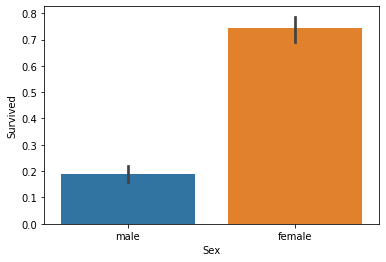

In [14]:
sns.barplot(x=data["Sex"], y=data["Survived"])

#### 객실 등급별 생존여부

* 아래는 단순 등급별로 확인

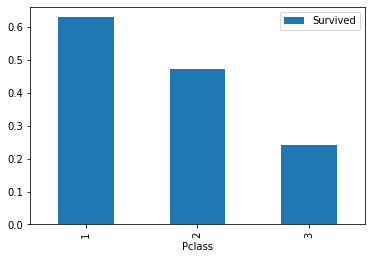

In [15]:
data[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

* 등급별로 남자/여자 따로 볼 경우

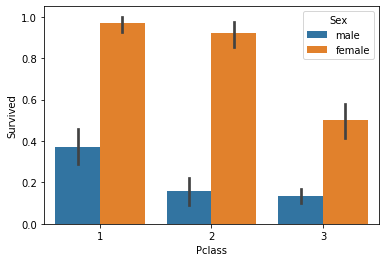

In [16]:
sns.barplot(x=data["Pclass"], y=data["Survived"], hue="Sex", data=data)

* 결론 : 1,2 등급은 큰 차이가 없으나, 3등급의 경우에는 생존확률도 낮고, 남성의 경우 1등실이 월등히 높은 생존율

### 전처리 : 크게 인코딩, 정규화 등

#### 참고) 인코딩 관련 : 레이블 인코딩, 원핫인코딩 etc

##### 레이블 인코딩 : 0부터 시작을 함!!

In [17]:
from sklearn.preprocessing import LabelEncoder

* 문제는 순서에 영향이 미칠 수 있음 --> 초등/중등/고등은 그 순서가 어느 정도 의미가 있지만, TV/냉장고/세탁기 등은 그 순서가 의미가 없음 --> 이 순서에 대한 영향을 제거하기 위해서 아래와 같은 One Hot Encoding방식을 사용함!!

##### One Hot Encoding : 주의사항은 Labeling을 수행을 한 이후에 적용이 가능함!!!!!!!

In [18]:
from sklearn.preprocessing import OneHotEncoder

##### 실질적인 pandas DF에서는  get_dummies()를 활용하면 쉽게 변환이 된다!!!

In [173]:
df = pd.DataFrame({"item":["TV","냉장고","전자레인지", "선풍기", "TV","냉장고", "냉장고"]})
pd.get_dummies(df)

,item_TV,item_냉장고,item_선풍기,item_전자레인지
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,1,0,0


#### 참고) 정규화 관련 : 서로 다른 특징들의 값을 일정ㅎㄴ 수준으로 맞추는 작업을 Feature scaling 이라고 함. 대표적인 방법으로는 표준화/정규화 등이 있음.     
* 표준화 : 각각의 특징을 평균0, 분산1인 가우시안 분포를 가지 값으로 변환을 하는 것!!!    
* 정규화 : 서로 다른 크기의 피처의 크기를 통일하기 위해서 변환해주는 것..천만원 단윈/ 원단위를 모두 같은 ㄷㄴ위로 하기 위해서 0~1사이의 값으로 각기 변경을 하는 것!!!!   
단, scikitlearn 정규화는 선형대수의 정규화 방식을 사용을 하여 조금은 다를 수 있으나, 기본 개념은 동일!!   
* 종류 : (표준화)StandardScaler, (정규화)MinMaxScaler etc

##### Standard Scaler : SVM의 RBF사용시, Liner Regression, Logistic Regression  등 데이터의 분포가 가우시안 분포 가정하는 것들에 대해서는 하는 것이 좀 더 좋을 수 있음!!

In [19]:
from sklearn.preprocessing import StandardScaler

##### MinMaxScaler : 0~1사이의 값들로 변환

In [20]:
from sklearn.preprocessing import MinMaxScaler

##### 간단한 iris데이터로 위의 변환들 확인해보기!!

In [176]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [177]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [180]:
# 표준화!!!!!
scaler = StandardScaler()
scaler.fit(iris_df)
# 아래의 결과는 array로 되어서 DF로 변환을 해야함!!!
iris_scaled = scaler.transform(iris_df)
#iris_scaled.mean()  # -> array로 변환이 되어서 이렇게 하면 1개의 값만 나온다!!!!!!

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_scaled_df.mean())
print(iris_scaled_df.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [181]:
# 정규화!!
scaler = MinMaxScaler()
scaler.fit(iris_df)
# 아래의 결과는 array로 되어서 DF로 변환을 해야함!!!
iris_scaled = scaler.transform(iris_df)
#iris_scaled.mean()  # -> array로 변환이 되어서 이렇게 하면 1개의 값만 나온다!!!!!!

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_scaled_df.mean())
print(iris_scaled_df.min())
print(iris_scaled_df.max())

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 연습!!!) 기본적으로 문자형 데이터를 수치형 데이터로 변형을 해야함!!! --> Encoding(Scikit learn 에서는 LabelEncoder라는 부분으로 되어 있음!!!) --> 기본 사용 방법 : Fit / transform

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
def encode_feature(df):
    # 변경할 컬럼 리스트
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for 마다 새로운 것이 불러올 것!!
        le = preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설절 및 그에 맞는 학습 수행 -> fit
        le = le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용!!!! -> transform
        df.loc[:, feature] = le.transform(df.loc[:, feature])
    
    return df  

In [23]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C


In [24]:
data = encode_feature(data)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


* 위의 변형 전과 변형 후 적용을 보면, 해당 컬럼들의 값들이 완전히 숫자들로 변형이 된 것을 확인을 함!!

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


#### 실제 필요한 부분들 함수화 -> 앞에서 pd.read_csv 하고 하는 것이라고 생각하고 진행을 할 것이고, 앞에서 내용 확인을 위해서 한 부분들도 필요한 부분이 있으면 함수화로 진행을 할 예정임.

##### null데이터 처리 함수 --> 앞에서 처리한 부분을 함수로 묶어서 두려는 것임!!  
단) Fare도 0으로 변경하는 부분 추가!!

In [26]:
def titanic_fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df


##### 불필요 컬럼 제거

In [27]:
def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

##### 인코딩

In [28]:
def format_features(df):
    # 1번 부분
    # Cabin 에서 필요 정보 변형 부분
    df.loc[:, "Cabin"] = df.loc[:, "Cabin"].apply(lambda x : str(x)[:1])
    
    # 2번 부분
    # 변경할 컬럼 리스트    
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for 마다 새로운 것이 불러올 것!!
        le = preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설절 및 그에 맞는 학습 수행 -> fit
        le = le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용!!!! -> transform
        df.loc[:, feature] = le.transform(df.loc[:, feature])

    return df  

##### 위의 전처리 들을 하나의 함수로 다시 묶는 부분

In [29]:
def titanic_transform(df):
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

##### 다시 처음부터 데이터를 불러오고 위의 작업을 일괄적용해보자!!

In [30]:
data_train = pd.read_csv('titanic_train.csv')

In [31]:
y_titanic_train = data_train.loc[:,"Survived"]
X_titanic_train = data_train.drop("Survived", axis = 1)

In [32]:
X_titanic_train.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [33]:
X_titanic_train = titanic_transform(X_titanic_train)
X_titanic_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


### 데이터 분리

In [34]:
from sklearn.model_selection import train_test_split

#### 그냥 분리

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train,
                                                    test_size=0.2, random_state=11)

* train  셋의 비율 확인

In [36]:
y_titanic_train.value_counts()/len(y_titanic_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [37]:
y_train.value_counts()/len(y_train)

0    0.605337
1    0.394663
Name: Survived, dtype: float64

In [38]:
y_test.value_counts()/len(y_test)

0    0.659218
1    0.340782
Name: Survived, dtype: float64

#### 비율 유지하는 stratify 사용 --> 특히 불균형 데이터의 경우!!   
사용법 : stratify 옵션을 사용할 것!!!!!

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.2, 
                                                    random_state=11)

* 셋의 비율 확인  --> stratify 을 사용하면, 분리 시에는 원본 비율을 거의 유지하는 식으로 샘플링을 하는 것을 볼 수 있음!!!!

In [40]:
y_titanic_train.value_counts()/len(y_titanic_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [41]:
y_train.value_counts()/len(y_train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [42]:
y_test.value_counts()/len(y_test)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

### 문제풀이에 필요한 모델들  : 분류 문제  --> 분류 알고리즘들 사용해서 확인해보기!! --> 각 알고리즘의 BaseLine 정도 확인용!!!

* knn으로 간단히 확인

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [62]:
knn = KNeighborsClassifier()

In [63]:
scores = cross_val_score(knn, 
                        X_train,
                        y_train,                    
                        cv= 5)
for iter_count, accuracy in enumerate(scores):
    print("knn 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("----------------------------------------")
# print("교차 검증 평균 정확도 :" ,scores.mean())
print("knn 교차 검증 평균 정확도 :{0:.4f}".format(scores.mean()) )

knn 교차 검증 0 & 정확도 0.7413
knn 교차 검증 1 & 정확도 0.6853
knn 교차 검증 2 & 정확도 0.7483
knn 교차 검증 3 & 정확도 0.7676
knn 교차 검증 4 & 정확도 0.7376
----------------------------------------
knn 교차 검증 평균 정확도 :0.7360


In [47]:
parameters = {
    "n_neighbors":[1,3,5,7],
    "weights":["uniform"]
}


In [48]:
n_iter_search = 10
knn_rgs = RandomizedSearchCV(knn,
                           param_distributions=parameters,
                           cv=7,
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search)
knn_rgs.fit(X_train, y_train)

Fitting 7 folds for each of 4 candidates, totalling 28 fits


/Users/minkyukwon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.5s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [49]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
parameters = {
    "n_neighbors":[3,5,7],
    "weights":["uniform"]
}


In [55]:
grid_knn_clf = GridSearchCV(knn,
                         param_grid=parameters,
                         scoring="accuracy",
                         cv=5,
                           n_jobs=-1)

In [56]:
grid_knn_clf.fit(X_train, y_train)

/Users/minkyukwon/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [57]:
grid_knn_clf.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [58]:
grid_knn_clf.best_score_

0.7359550561797753

In [60]:
knn_best=grid_knn_clf.best_estimator_

knn_predictions = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, knn_predictions)
print("knn에서 GridSearchCV로 찾은 결과 : {0: .4f}".format(accuracy))

knn에서 GridSearchCV로 찾은 결과 :  0.7318


# Q) To Do List : SVM, RandomForest 에서 최적의 모델을 만드세요!!!